<a href="https://colab.research.google.com/github/spaceo521/Data-Science-Projects/blob/main/Social%20Media%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import pandas for data manipulation and analysis

import pandas as pd

# Import numpy for numerical operations and data manipulation

import numpy as np

# Import re module for working with regular expressions

import re

# Import nltk (Natural Language Toolkit) for natural language processing

import nltk

# Import stopwords from nltk.corpus for common word removal

from nltk.corpus import stopwords

# Import word_tokenize from nltk.tokenize for tokenization

from nltk.tokenize import word_tokenize

# Import WordNetLemmatizer from nltk.stem for lemmatization

from nltk.stem import WordNetLemmatizer

# Import TfidfVectorizer from sklearn.feature_extraction.text for TF-IDF vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

# Import train_test_split from sklearn.model_selection for splitting data

from sklearn.model_selection import train_test_split

# Import RandomForestClassifier from sklearn.ensemble for random forest model

from sklearn.ensemble import RandomForestClassifier

# Import evaluation metrics from sklearn.metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import matplotlib.pyplot from matplotlib for plotting

import matplotlib.pyplot as plt

# Import seaborn as sns for enhanced plotting capabilities

import seaborn as sns

In [ ]:
#to load the dataset
df = pd.read_csv('Tweets.csv')


In [ ]:
# Display the first 5 rows of the DataFrame

print(df.head())

# This includes information about the columns, data types, and memory usage

print(df.info())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [ ]:

def preprocess_text(text):

      # Remove non-word characters and replace with a space

    text = re.sub(r'\W+', ' ', text)
        # Remove URLs (http links)

    text = re.sub(r'http\S+', '', text)
        # Remove Twitter mentions (@username)

    text = re.sub(r'@\S+', '', text)
        # Convert text to lowercase

    text = text.lower()
        # Tokenize text into words

    tokens = word_tokenize(text)
        # Remove stopwords (common words that do not carry much meaning)

    stop_words = set(stopwords.words('english'))

        # Lemmatize words (reduce words to their base or root form)

    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
        # Join tokens back into a single string

    clean_text = ' '.join(tokens)
    return clean_text

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')

df = pd.read_csv('Tweets.csv')

def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = text.lower()
    tokens = word_tokenize(text) # Requires 'punkt' resource
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmati

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet') # You will need this for the lemmatizer
nltk.download('stopwords') # You will need this for the stopwords

import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd

df = pd.read_csv('Tweets.csv')

def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = text.lower()
    tokens = word_tokenize(text) # Requires 'punkt' resource
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer() # You forgot to instantiate the lemmatizer
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    clean_text = ' '.join(tokens)
    return clean_text

# Apply the preprocess_text function to create a new column 'clean_text' in df

df['clean_text'] = df['text'].apply(preprocess_text)
 # Create the 'clean_text' column
# Separate the cleaned text (X) and target variable (y)

X = df['clean_text']
y = df['airline_sentiment']
# Print the first few rows of X to verify

print(X.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                          virginamerica dhepburn said
1    virginamerica plus added commercial experience...
2    virginamerica today must mean need take anothe...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: clean_text, dtype: object


<ipython-input-18-e11dd0aa4ae2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df, palette='muted')


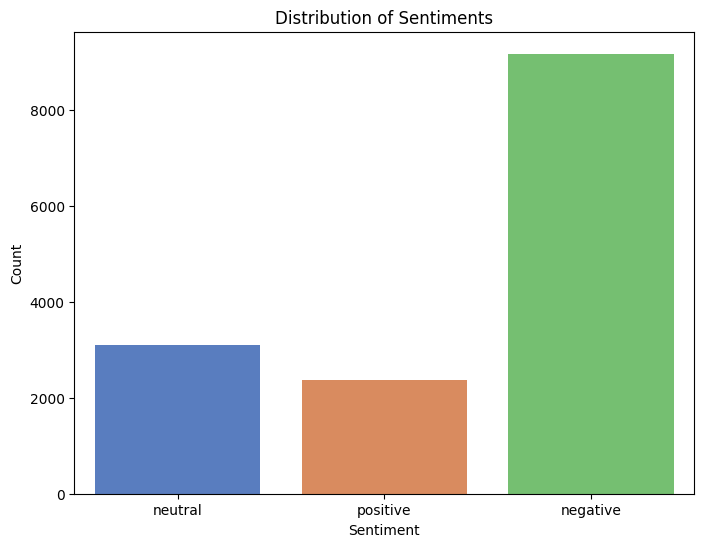

In [ ]:
#to draw the plot
plt.figure(figsize=(8, 6))
sns.countplot(x='airline_sentiment', data=df, palette='muted')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# Split the data into training and testing sets
# X contains the cleaned text data, y contains the target variable (e.g., sentiment labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the TfidfVectorizer with a maximum of 5000 features

vectorizer = TfidfVectorizer(max_features=5000)
# Fit and transform the training data (X_train) into TF-IDF vectors

X_train_tfidf = vectorizer.fit_transform(X_train)
# Transform the test data (X_test) into TF-IDF vectors

X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Initialize the RandomForestClassifier with 100 estimators and a random state of 42

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the RandomForestClassifier on the TF-IDF transformed training data

rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict labels for the test data using the trained rf_classifier

y_pred = rf_classifier.predict(X_test_tfidf)


In [ ]:
# Calculate accuracy score between y_test (true labels) and y_pred (predicted labels)

accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy score

print(f'Accuracy: {accuracy * 100:.2f}%')
# Print the classification report which includes precision, recall, f1-score, and support

print(classification_report(y_test, y_pred))

Accuracy: 76.23%
              precision    recall  f1-score   support

    negative       0.79      0.93      0.86      1889
     neutral       0.60      0.39      0.47       580
    positive       0.74      0.54      0.62       459

    accuracy                           0.76      2928
   macro avg       0.71      0.62      0.65      2928
weighted avg       0.75      0.76      0.74      2928



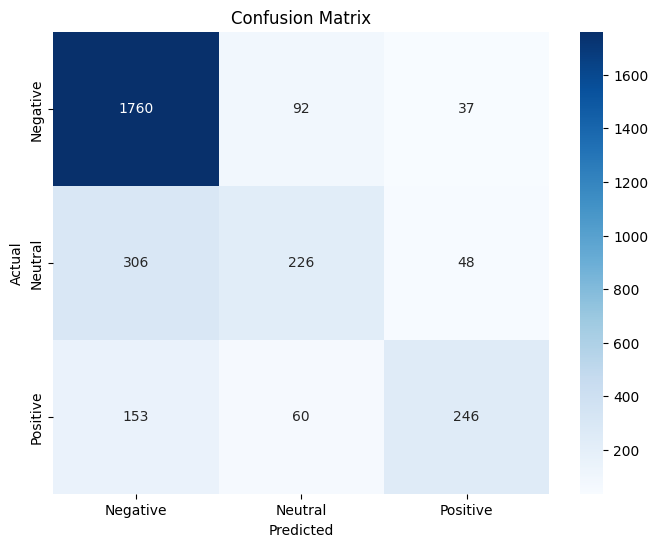

In [ ]:
#to display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()